<a href="https://colab.research.google.com/github/polyanoo/compiling/blob/main/%D0%9F%D0%BE%D0%BF%D0%BE%D0%B2%D0%B0_%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%B0_%D0%B4%D0%B71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 19:23:23--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2024-01-28 19:23:23 (53.8 MB/s) - ‘input.txt.1’ saved [1115394/1115394]



In [32]:
import re
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
file_path = 'input.txt'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
with open(file_path, 'r') as file:
    text_content = file.read()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_text = clean_text(text_content)

tokens = word_tokenize(cleaned_text)

stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

In [44]:
model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4)
model.wv['king']

array([ 9.3145944e-05,  3.1112744e-03, -6.7663677e-03, -1.3235710e-03,
        7.7920300e-03,  7.1407780e-03, -3.5348057e-03,  2.7354809e-03,
       -8.4440298e-03,  6.1859712e-03, -4.6623680e-03, -3.3372582e-03,
        9.1934754e-03,  8.8475487e-04,  7.5921416e-03, -6.2295008e-03,
        5.1741037e-03,  9.7883046e-03, -8.5034324e-03, -5.2907323e-03,
       -6.9990945e-03, -4.7875969e-03, -3.6863915e-03, -8.5909516e-03,
        7.8024808e-03, -4.8888149e-03,  8.3964830e-03,  5.1851803e-03,
       -6.6043390e-03,  3.8205017e-03,  5.6213746e-03, -7.4163340e-03,
       -7.3872157e-03, -2.5352181e-03, -8.5831629e-03, -1.4452643e-03,
       -2.8707134e-04,  3.3098783e-03,  1.3657493e-03, -9.9832762e-04,
       -5.5922349e-03,  1.5047805e-03, -1.0559289e-03,  6.8209413e-03,
        4.0603448e-03,  4.5962986e-03,  1.3078121e-03, -2.6980136e-03,
       -4.2355629e-03, -9.2618784e-04,  1.4751214e-03, -2.7258794e-03,
       -7.0957462e-03, -7.9152538e-03, -9.2687905e-03, -5.7968101e-03,
      

In [45]:
model.wv.most_similar(["king"])

[('following', 0.37871962785720825),
 ('halfmoon', 0.36562228202819824),
 ('hencebanished', 0.35695189237594604),
 ('tops', 0.3323342800140381),
 ('therewith', 0.32556644082069397),
 ('dissension', 0.32018423080444336),
 ('debt', 0.31755542755126953),
 ('quarter', 0.31566405296325684),
 ('savageness', 0.3156253397464752),
 ('banks', 0.3146883547306061)]

In [46]:
model.wv.most_similar(["queen"])

[('oercoverd', 0.3648677170276642),
 ('close', 0.3439558148384094),
 ('ache', 0.33714985847473145),
 ('bruise', 0.3322811424732208),
 ('domestic', 0.3315054178237915),
 ('confound', 0.3264138102531433),
 ('oerbear', 0.32451361417770386),
 ('darkly', 0.31663644313812256),
 ('unless', 0.3116218149662018),
 ('retail', 0.2993168532848358)]

In [47]:
model.wv.similarity('king', 'queen')

-0.036845148

In [52]:
model.wv.similarity('king', 'prince')

0.10492411

In [48]:
model.wv.doesnt_match(['king', 'queen', 'prince', 'princess'])

'princess'

In [53]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

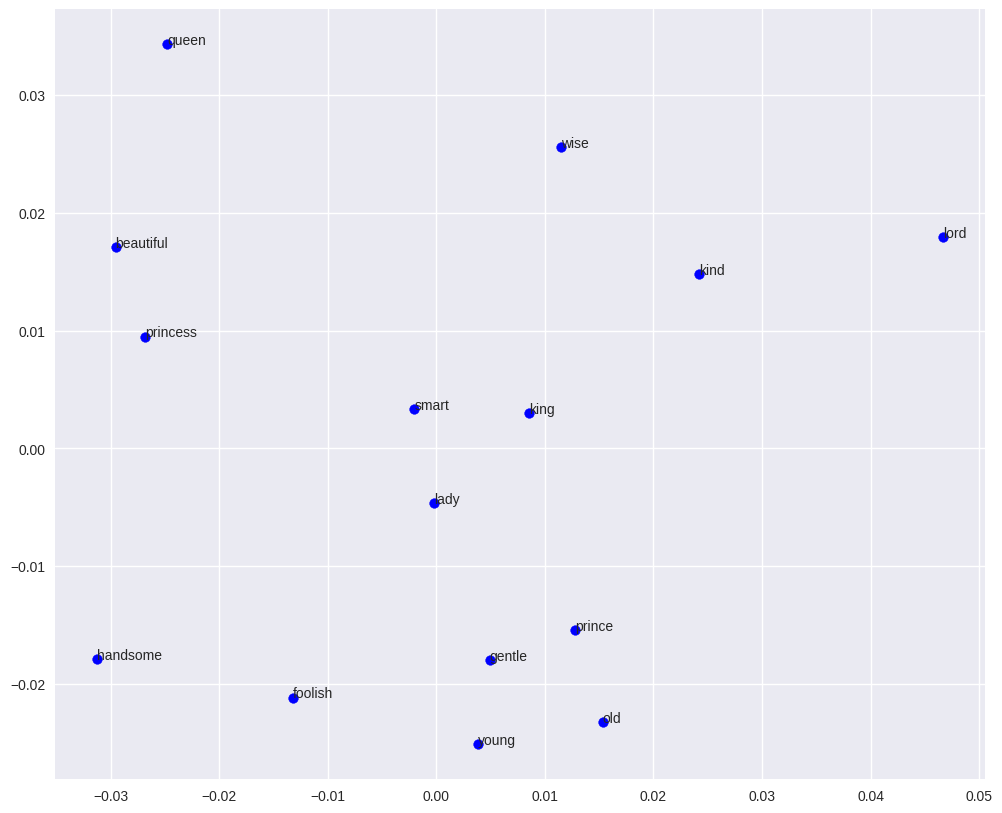

In [51]:
plt.style.use('seaborn-v0_8')

def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors)
  plt.figure(figsize=(12,10))
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='b')
  for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))


pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young', 'wise','foolish',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

После удаления стоп-слов связи стали видны лучше (но все еще не идеальны?)
Возможно, если добавить еще и лемматизацию, связи станут еще лучше... Простите, меня не было на парах и я почти ничего не поняла, но я обязательно разберусь((